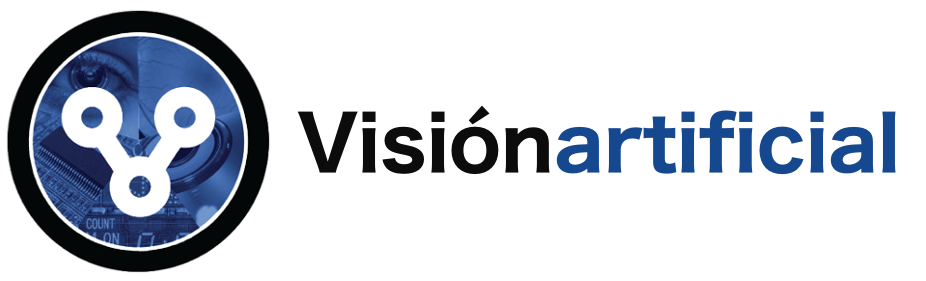

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.

<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# Atención visual selectiva: saliencia

Este caderno de Jupyter trata sobre a detección da saliencia, que é a modelización computacional da atención visual selectiva para localizar automaticamente as rexións perceptualmente máis "relevantes" dunha imaxe.

En esencia, a importancia é o que "destaca" nunha foto ou nunha escena, permitindo que a súa conexión ollo-cerebro se centre de forma rápida (e esencialmente inconscientemente) nas rexións máis importantes.

Por exemplo, considera a figura na celas inferiores deste caderno na que ves un campo de fútbol cun xogador nel. Ao mirar a foto, os teus ollos céntranse automaticamente no xogador xa que son as áreas máis importantes da foto. Este proceso automático de localización das partes importantes dunha imaxe ou escena chámase detección do mapa de saliencia (pode ser interpretado como mapa de probabilidade que representa a posibilidade que ten cada píxel de recibir unha fixación).

A detección de saliencia aplícase a moitos aspectos da visión artificial e do procesamento de imaxes, pero algunhas das aplicacións máis populares inclúen:

- Detección de obxectos: en lugar de aplicar de forma exhaustiva unha xanela deslizante e unha pirámide de imaxes, só aplicaremos o noso algoritmo de detección (costoso computacionalmente) ás rexións máis salientables e interesantes dunha imaxe con máis probabilidade de conter un obxecto.

- Publicidade e mercadotecnia: deseña logotipos e anuncios que nos "destaquen" dunha simple ollada

- Robótica — Deseña robots con sistemas visuais  activos similares aos dos humanos


## Tres algoritmos de saliencia implementados en OpenCV

En OpenCV, existen tres algoritmos principais de detección de saliencia:

- Saliencia estática: esta clase de algoritmos de dsaliencia depende de características e estatísticas da imaxe para localizar as rexións máis relevantes da imaxe.
- Saliencia dinámica (movemento): os algoritmos desta clase normalmente procesan os fotogramas, facendo un seguimento dos obxectos que se "moven", e polo tanto son considereados perceptualmente relevantes.
- Baseados nunha medida de "obxecto": estes algoritmos calculan unha medida de "obxecto" e xeran un conxunto de "propostas", ou máis simplemente, caixas delimitadoras de onde pensa que pode estar un obxecto na imaxe.

Ten en conta que a saliencia computacional non é o tópico coñecido como detección de obxectos. O algoritmo saliencia subxacente non ten idea de se hai un obxecto particular nunha imaxe ou non.

Pola contra, o detector de relevancia simplemente está a informar onde pensa que pode estar un obxecto na imaxe; depende de ti e do teu algoritmo real de detección/clasificación de obxectos:

- Procesar a rexión proposta polo detector de saliencia
- Prever/clasificar a rexión e tomar calquera decisión sobre esta predición

Os detectores saliencia que nos interesan en robótica son os algoritmos rápidos capaces de executarse en tempo real. Os resultados do detector de relevancia pásanse despois a algoritmos computacionalmente costosos que non podemos executar en cada píxel da imaxe de entrada se queremos manter a restricción de tempo real (ou próximo).


Para empregar os detectores de saliencia de OpenCV, necesitarás OpenCV 3 ou superior. Documentación oficial de OpenCV sobre estebmódulo pódela atopar [nesta páxina](https://docs.opencv.org/3.4.2/d8/d65/group__saliency.html).

Ten en conta que terás que ter OpenCV compilado coa opción do módulo "contrib" habilitado. Lémbrte da primeira práctica deste curso onde compilamos OpenCV e o instalamos con esta opción.

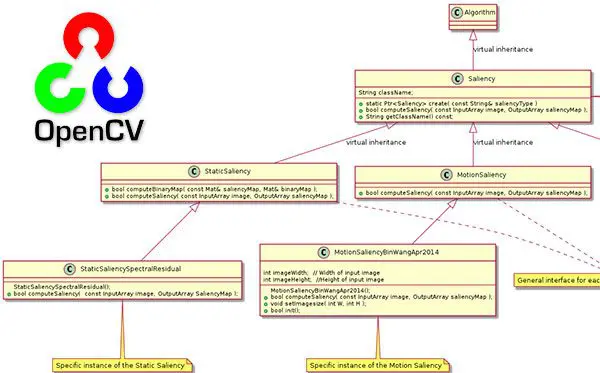

### Importamos as librarias

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import argparse
import imutils
import cv2

### Función para visualizar imaxes en Jupyter Notebooks

In [2]:
def plt_imshow(title, image):
	# convertemos a imaxe de  BGR a RGB para visualizala con maplotlib
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

### Saliencia Estática

OpenCV implementa dous algoritmos para a saliencia estática.

- O primeiro método é da publicación de 2010 de Montabone e Soto, [Human detection using a mobile platform and novel features derived from a visual saliency mechanism](https://www.sciencedirect.com/science/article/pii/S0262885609001371). Este algoritmo utilizouse inicialmente para detectar humanos en imaxes e vídeo, pero tamén se pode xeneralizar a outras formas de saliencia.
- O segundo método é de Hou e Zhang no seu artigo CVPR de 2007, [Saliency detection: A spectral residual approach](http://bcmi.sjtu.edu.cn/~zhangliqing/Papers/2007CVPR_Houxiaodi_04270292.pdf). Este algoritmo opera co  espectro en escala logarítmica dunha imaxe, calcula os residuos e logo mapea as localizacións salientables correspondentes ao dominio espacial. Consulta o artigo para máis detalles.

In [3]:

# Como estamos empregando un Jupyter Notebooks podemos reemplazar o 
# analizados de comandos por un diccionario con valores "fixos" 
args = {
	"image": "visuais/neymar.jpg"
}

# cargamos a imaxe de entrada
image = cv2.imread(args["image"])

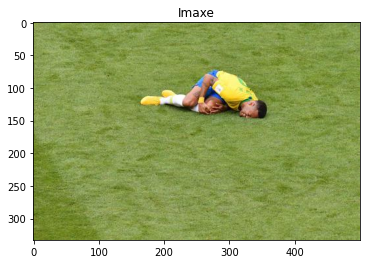

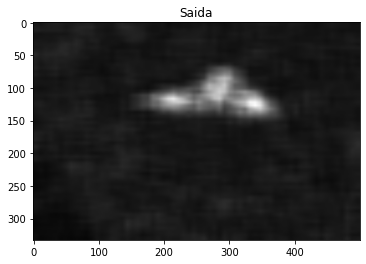

In [4]:
# inicializamos o detector de saliencia do residuo espectral de OpenCV e
# calculamos o mapa de saliencia
saliency = cv2.saliency.StaticSaliencySpectralResidual_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")
plt_imshow("Imaxe", image)
plt_imshow("Saida", saliencyMap)

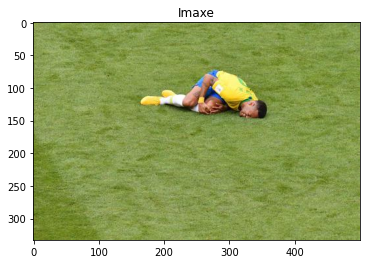

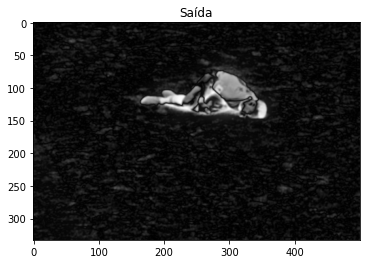

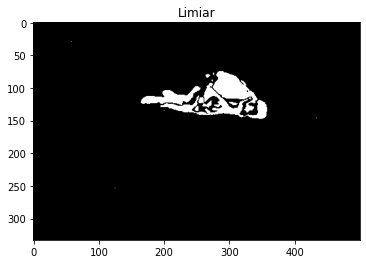

In [5]:
# inicializamos o detector de saliencia "fine grained" de OpenCV e 
# calculamos o mapa de saliencia
saliency = cv2.saliency.StaticSaliencyFineGrained_create()
(success, saliencyMap) = saliency.computeSaliency(image)
saliencyMap = (saliencyMap * 255).astype("uint8")

# Se desexas un mapa binario porque queremos atopar contornos,
# podemos computar a envolvente (convex hull), extraer as caixas dos bordes, etc., 
# adicinalmente podemos establecer un limiar sobre o mapa de saliencia
threshMap = cv2.threshold(saliencyMap, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

# Visualozamos as imaxes
plt_imshow("Imaxe", image)
plt_imshow("Saída", saliencyMap)
plt_imshow("Limiar", threshMap)

## Algoritmos de saliencia orientados a obxectos

OpenCV inclúe un detector de saliencia baseado nunha medida de "obxecto" — [BING: Binarized normed gradients for objectness estimation at 300fps](https://mmcheng.net/bing/), de Cheng et al. (CVPR 2014).

A diferenza dos outros detectores de saliencia en OpenCV, que son totalmente autónomos na súa implementación, o detector BING require nove ficheiros de modelos separados para varios tamaños de ventá, espazos de cor e operacións matemáticas (aportados no cartafol de visuais). Estes nove ficheiros de modelos apenas ocupan disco (~ 10 KB) e é extremadamente rápido cargalos, o que fai de BING un método rapido para a saliencia e válido para o noso campo da robótica.

In [18]:
#Diccionario con opcións de entrada en substitución do analizador 
#de argumentos de entrada a un programa por liña de comandos
args = {
    "model": "visuais/objectness_trained_model",
    "image": "visuais/barcelona.png",
    "max_detections": 10
}

# cargamos a imaxe de entrada
image = cv2.imread(args["image"])
if image is None:
    print("imaxe non atopada")

In [19]:
# Inicializamos un detector de saliencia orientado a obxectos de OpenCV e 
# establecemos o path ao modelo para cargalo (previamente adestrado)
saliency = cv2.saliency.ObjectnessBING_create()
saliency.setTrainingPath(args["model"])

# achamos as caixas dos obxectos detectados
(success, saliencyMap) = saliency.computeSaliency(image)
numDetections = saliencyMap.shape[0]

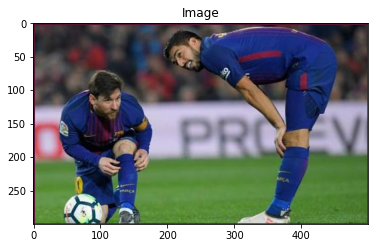

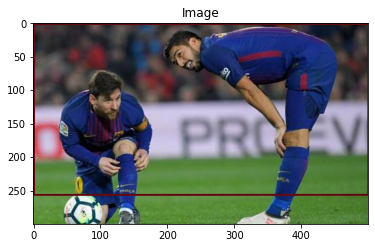

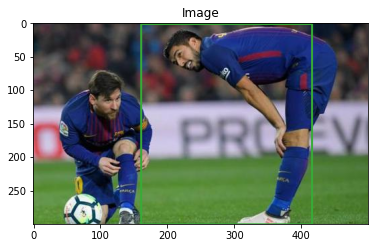

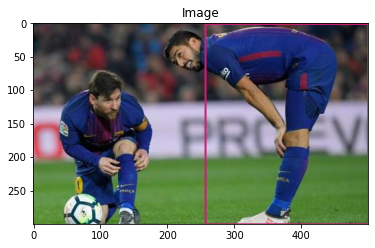

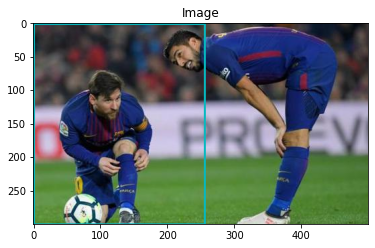

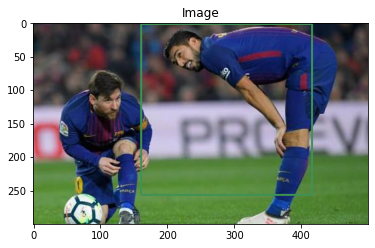

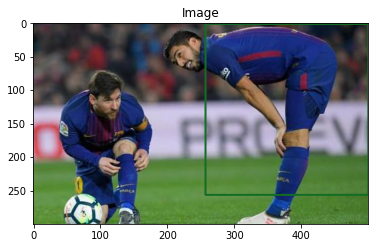

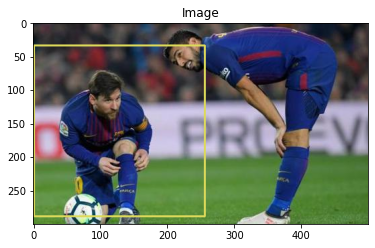

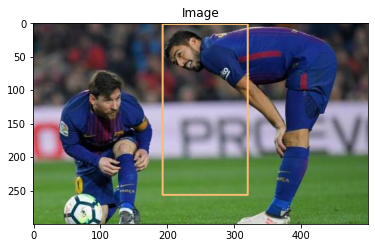

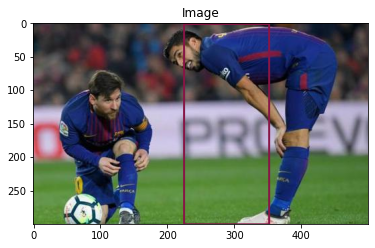

In [20]:
# lazo sobre cada deteccion
for i in range(0, min(numDetections, args["max_detections"])):
	#extraemos as coordenadas de cada caixa do obxecto detectado
	(startX, startY, endX, endY) = saliencyMap[i].flatten()
	
	# xeramos aleatoriamente unha cor para o obxecto e debuxamolo na imaxe
	output = image.copy()
	color = np.random.randint(0, 255, size=(3,))
	color = [int(c) for c in color]
	cv2.rectangle(output, (startX, startY), (endX, endY), color, 2)

	# show the output image
	plt_imshow("Image", output)

### Saliencia Dinámica

O último detector de saliencia en OpenCV procede da publicación de 2014 de Wang e Dudek, [A fast self-tuning background subtraction algorithm](https://ieeexplore.ieee.org/document/6910012/).

Este algoritmo está deseñado para traballar con vídeo onde se consideran salientables os obxectos que se moven na fonte de vídeo. Os resultados deste algoritmo, para determinado tipo de vídeos, poden ser bastente pobres.

In [34]:
#Diccionario con opcións de entrada en substitución do analizador 
#de argumentos de entrada a un programa por liña de comandos
args = {
    "input": "visuais/SCD_circulos_1sentido_contrario.avi",
    "output_original": "output_orixinal.avi",
    "output_saliency_map": "output_saliency_map.avi"
}

# Inicializamos o obxecto saliencia
saliency = None

In [35]:
print("[INFO] cargando o ficheiro de video...")
vs = cv2.VideoCapture(args["input"])
initWriters = True
writer = {"original": None, "saliencyMap": None}

[INFO] cargando o ficheiro de video...


In [36]:
# lazo sobre todos os frames
while True:
	# seguinte frame
	frame = vs.read()[1]

	# se non podemos ler mais frames, chegamos ao final
	if frame is None:
		break

	# redimensionamos o frame para que teña un ancho minimo de 500 pixeles
	frame = imutils.resize(frame, width=500)

	# Seo noso obxecto de saliencia e None, precisamos instancialo
	if saliency is None:
		saliency = cv2.saliency.MotionSaliencyBinWangApr2014_create()
		saliency.setImagesize(frame.shape[1], frame.shape[0])
		saliency.init()
  
    # convertimos o frame lido a escala de grises e achamos o mapa de saliencia
	# baseado nun modelo de movemento
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	(success, saliencyMap) = saliency.computeSaliency(gray)
	saliencyMap = (saliencyMap * 255).astype("uint8")

	# comprobamos se temos inicializado o obxecto para escribir videos a disco
	if initWriters:
		# inicializamos os tres obxectos para grabar os tres videos que precisamos
		fourcc = cv2.VideoWriter_fourcc(*"MJPG")
		writer["original"] = cv2.VideoWriter(args["output_original"], fourcc,
			20,(frame.shape[1], frame.shape[0]), True)
		writer["saliencyMap"] = cv2.VideoWriter(args["output_saliency_map"], fourcc, 20,
			(saliencyMap.shape[1], saliencyMap.shape[0]), False)
  
        # ponhemos o flag de inicializacion a False
		initWriters = False
  
	# ise temos obxectos para escribir os videos, escribimos a disco
	if not initWriters:
		writer["original"].write(frame)
		writer["saliencyMap"].write(saliencyMap)

In [37]:
# limpeza de obxecto
vs.release()

# comprobamos se se precisa eliminar oas obxectos grabadores de video
if not initWriters:
	writer["original"].release()
	writer["saliencyMap"].release()

A salida dos nosos videos será en formato `.avi`. Primeiro, imos a convertelos a formato  `.mp4`.

In [45]:
!ffmpeg -i output_orixinal.avi output_orixinal.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [46]:
!ffmpeg -i output_saliency_map.avi output_saliency_map.mp4

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [47]:
#@title visualizacion do video inline
from IPython.display import HTML
from base64 import b64encode

mp4 = open("output_orixinal.mp4", "rb").read()
dataURL = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % dataURL)

In [48]:
#@title visualizacion do video de saliencia de movemento inline
from IPython.display import HTML
from base64 import b64encode

mp4 = open("output_saliency_map.mp4", "rb").read()
dataURL = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % dataURL)

O código para visualizar vídeos dentro dun Jupyter notebook foi extraido dende esta ligazón: [this StackOverflow thread](https://stackoverflow.com/a/57378660/7636462). 